In this notebook we will first analyze the bike share dataset using pandas and then build a linear regression model from scratch to forecast the demand for the last 30 days

In [97]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
bikeshare_df = pd.read_csv('bikeshare_hour.csv')

print (bikeshare_df.head())
print (bikeshare_df.describe())
print (bikeshare_df.shape)
print (bikeshare_df.isnull().sum(axis = 0))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
          instant        season            yr          mnth            hr  \
count  17379.0000  173

So we can see that there are no null values and total number of rows is 17379. Below is the desc of the dataset

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [98]:
def define_seasons(x):
    if x == 1:
        return 'Spring'
    elif x ==2:
        return 'Summer'
    elif x ==3:
        return 'Fall'
    elif x ==4:
        return 'Winter'

bikeshare_df['seasons_defined'] = bikeshare_df['season'].apply(define_seasons)

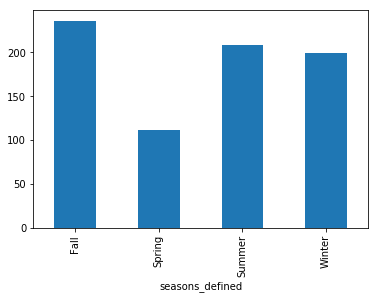

In [99]:
#first let's look at the rentals by weather. So the hourly average is highest in Fall
bikeshare_df.groupby('seasons_defined').mean()['cnt'].plot.bar()

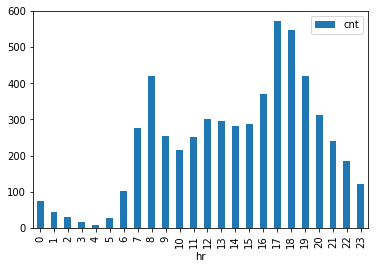

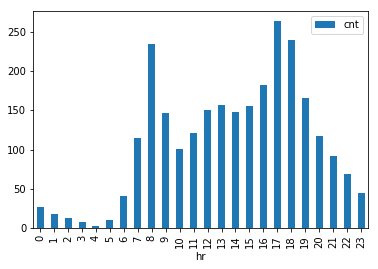

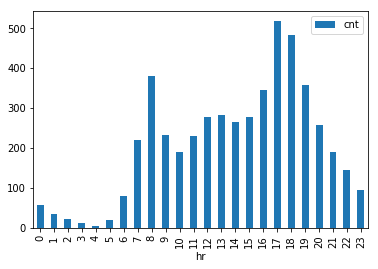

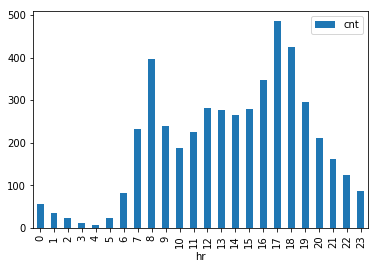

In [100]:
#Now lets look at which time of the day is the busiest by season
bikeshare_df.groupby(['seasons_defined','hr']).mean()[['cnt']].loc['Fall'].plot.bar()
bikeshare_df.groupby(['seasons_defined','hr']).mean()[['cnt']].loc['Spring'].plot.bar()
bikeshare_df.groupby(['seasons_defined','hr']).mean()[['cnt']].loc['Summer'].plot.bar()
bikeshare_df.groupby(['seasons_defined','hr']).mean()[['cnt']].loc['Winter'].plot.bar()

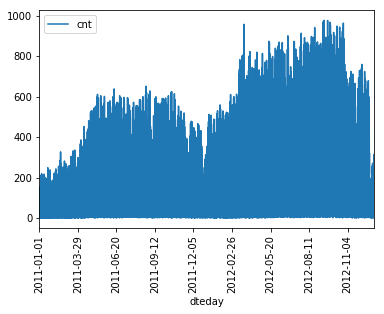

In [101]:
#Let's plot the total number of rentals and see how is looks like

bikeshare_df[['dteday','cnt']].plot(x = 'dteday', y = 'cnt',rot=90)

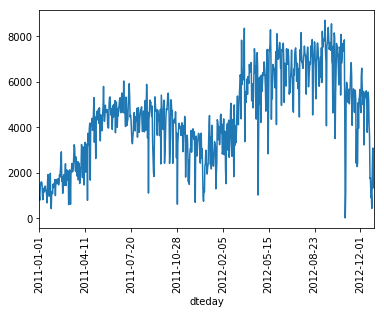

In [102]:
#same graph on a daily basis
bikeshare_df.groupby('dteday').sum()['cnt'].plot(rot=90)

In [103]:
print (bikeshare_df['dteday'].nunique())
print (bikeshare_df['dteday'].min())
print (bikeshare_df['dteday'].max())


731
2011-01-01
2012-12-31


In [104]:
#Now we will be building a model to predict the number of rentals for the month of Dec 2012
#We will be using the daily dataset for this model
bikeshare_daily_df = pd.read_csv('bikeshare_day.csv')
print (bikeshare_daily_df['dteday'].nunique())
print (bikeshare_daily_df['dteday'].min())
print (bikeshare_daily_df['dteday'].max())

731
2011-01-01
2012-12-31


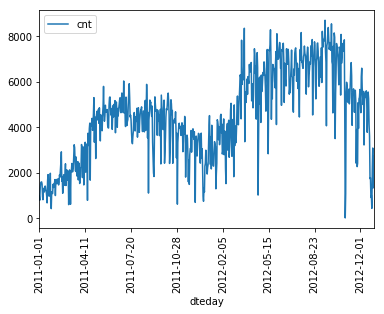

In [105]:
bikeshare_daily_df[['dteday','cnt']].plot(x = 'dteday', y ='cnt', rot=90)

First let's do some feature engineering. The features we will be using are:
- Day of week (dummy)
- Season (dummy)
- Temperature
- Humidity
- Weather type (dummy)
- Holiday Flag
- Windspeed
- 1,3,7,14,30,60 and 140 days mean, median, min, max, std
- DOW average for the last 4 weeks and 20 weeks
- count on the same day a year ago

The evaluation metric is root mean square errors

In [107]:
#Let's create the dummy variables first
dummies_day_week = pd.get_dummies(bikeshare_daily_df['weekday']).rename(columns=lambda x: 'weekday_' + str(x))

In [109]:
bikeshare_daily_df = pd.concat([bikeshare_daily_df, dummies_day_week], axis=1)

In [110]:
dummies_season = pd.get_dummies(bikeshare_daily_df['season']).rename(columns=lambda x: 'season_' + str(x))

In [111]:
bikeshare_daily_df = pd.concat([bikeshare_daily_df, dummies_season], axis=1)

In [ ]:
dummies_weather = pd.get_dummies(bikeshare_daily_df['weathersit']).rename(columns=lambda x: 'weather_' + str(x))

In [ ]:
bikeshare_daily_df = pd.concat([bikeshare_daily_df, dummies_weather], axis=1)